# **Libraries and loading initial data**

In [ ]:
!pip install rasterio


In [5]:
import os
import rasterio
import numpy as np
from rasterio import plot
import matplotlib.pyplot as plt

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
base_path = '/content/drive/MyDrive/GEE_exports'
os.chdir(base_path)

In [8]:
print(os.getcwd())
print(os.listdir())

/content/drive/MyDrive/GEE_exports
['RGB_NIR_JunSep2024.tif', 'reprojected.tif', 'reprojected2.tif']


In [9]:
dataset = rasterio.open('RGB_NIR_JunSep2024.tif')

# **Getting Metadata**

In [ ]:
# Check number of bands, dimensions, dtype, CRS, transform
print("Band count:", dataset.count)
print("Width x Height:", dataset.width, "x", dataset.height)
print("Resolution:", dataset.res)
print("Data type:", dataset.dtypes[0])
print("CRS:", dataset.crs)
print("Transform\n",dataset.transform)

Band count: 4
Width x Height: 842 x 807
Resolution: (8.983152841195215e-05, 8.983152841195215e-05)
Data type: float64
CRS: EPSG:4326
Transform
 | 0.00, 0.00,-78.65|
| 0.00,-0.00,-0.91|
| 0.00, 0.00, 1.00|


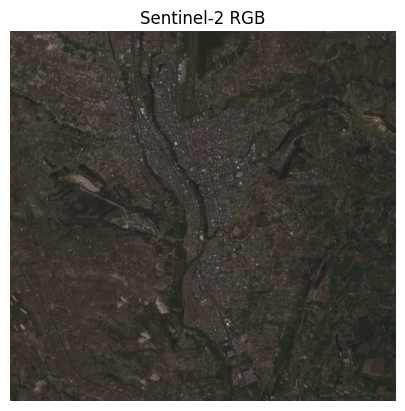

In [ ]:
# initial visualization
rgb = dataset.read([1, 2, 3])
rgb = rgb.transpose(1, 2, 0)
plt.imshow(rgb)
plt.title("Sentinel-2 RGB")
plt.axis('off')
plt.show()

## **Vizualisation RGB geographic coordinates**

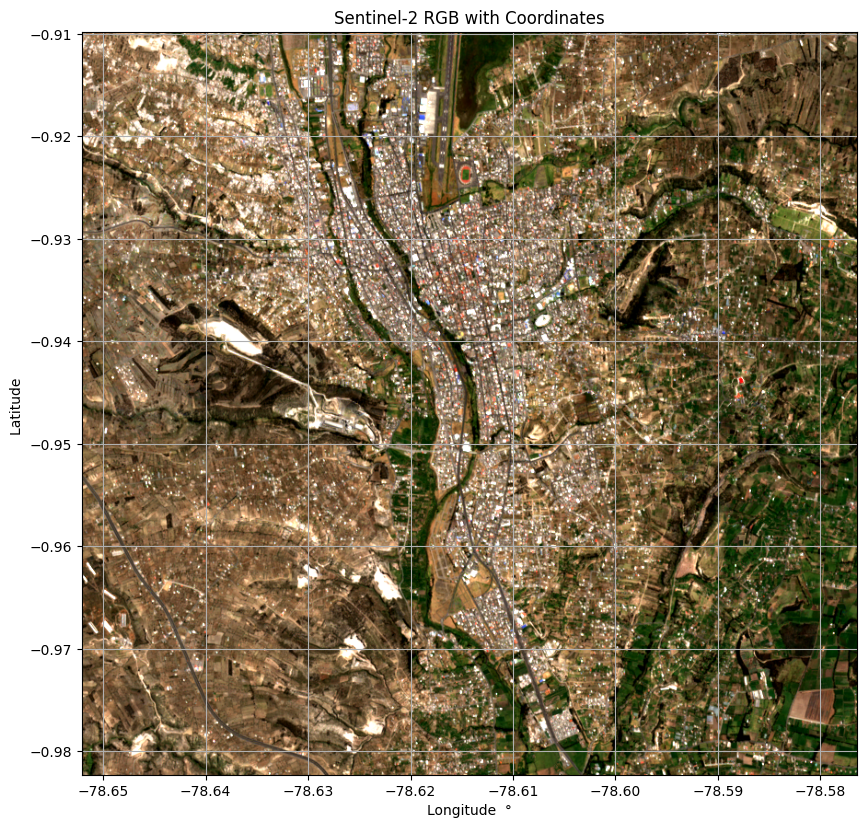

In [ ]:
# Plot with coordinates
rgb = dataset.read([1, 2, 3])
rgb = rgb.transpose(1, 2, 0)
bounds = dataset.bounds
extent = [bounds.left, bounds.right, bounds.bottom, bounds.top]
# Apply percentile stretching (e.g., 2nd and 98th percentiles)
p2 = np.percentile(rgb, 2)
p98 = np.percentile(rgb, 98)
rgb_stretched = np.clip((rgb - p2) / (p98 - p2), 0, 1)
# Plot with coordinates
plt.figure(figsize=(10, 10))
plt.imshow(rgb_stretched, extent=extent)
plt.xlabel("Longitude  °")
plt.ylabel("Latitude ")
plt.title("Sentinel-2 RGB with Coordinates")
plt.grid(True)
plt.show()

#**Vizualisation RGB UTM coordinates (QGIS)**

In [ ]:
dataset2 = rasterio.open('reprojected.tif')

In [ ]:
# Check number of bands, dimensions, dtype, CRS, transform
print("Band count:", dataset2.count)
print("Width x Height:", dataset2.width, "x", dataset2.height)
print("Resolution:", dataset2.res)
print("Data type:", dataset2.dtypes[0])
print("CRS:", dataset2.crs)
print("Transform\n",dataset2.transform)

Band count: 4
Width x Height: 845 x 805
Resolution: (9.972022248520764, 9.972022236025204)
Data type: float64
CRS: EPSG:32717
Transform
 | 9.97, 0.00, 761299.66|
| 0.00,-9.97, 9899353.11|
| 0.00, 0.00, 1.00|


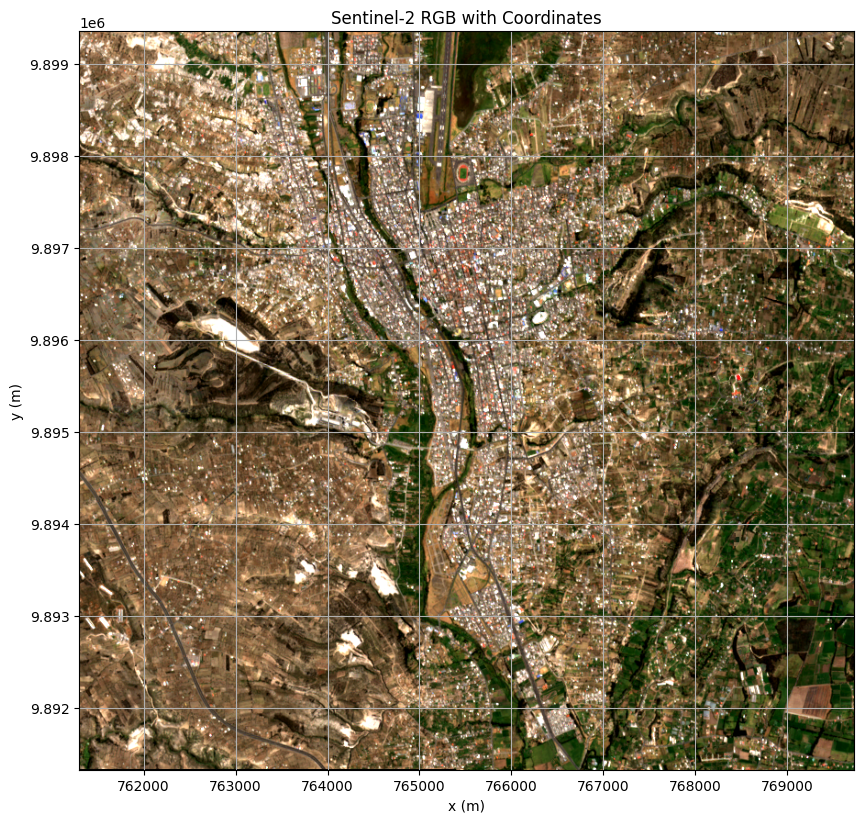

In [ ]:
# Plot with coordinates
rgb2 = dataset2.read([1, 2, 3])
rgb2 = rgb2.transpose(1, 2, 0)
bounds2 = dataset2.bounds
extent2 = [bounds2.left, bounds2.right, bounds2.bottom, bounds2.top]
# Apply percentile stretching (e.g., 2nd and 98th percentiles)
p2 = np.percentile(rgb2, 2)
p98 = np.percentile(rgb2, 98)
rgb_stretched2 = np.clip((rgb2 - p2) / (p98 - p2), 0, 1)
plt.figure(figsize=(10, 10))
plt.imshow(rgb_stretched2, extent=extent2)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Sentinel-2 RGB with Coordinates")
plt.grid(True)
plt.show()

#**Vizualisation RGB UTM coordinates (Reprojection code)**

In [10]:
from rasterio.warp import calculate_default_transform, reproject, Resampling

In [11]:
# Define the target CRS (example: UTM Zone 17S for Latacunga)
dst_crs = 'EPSG:32717'
with rasterio.open("RGB_NIR_JunSep2024.tif") as src:
    # Calculate transform and new dimensions for target CRS
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds, resolution=10.0)

    # Update metadata for output
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    # Create new reprojected raster
    with rasterio.open('reprojected2.tif', 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):  # loop over bands
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.bilinear  # Or nearest for categorical data
            )

In [12]:
dataset3 = rasterio.open('reprojected2.tif')

In [13]:
# Check number of bands, dimensions, dtype, CRS, transform
print("Band count:", dataset3.count)
print("Width x Height:", dataset3.width, "x", dataset3.height)
print("Resolution:", dataset3.res)
print("Data type:", dataset3.dtypes[0])
print("CRS:", dataset3.crs)
print("Transform\n",dataset3.transform)

Band count: 4
Width x Height: 843 x 803
Resolution: (10.0, 10.0)
Data type: float64
CRS: EPSG:32717
Transform
 | 10.00, 0.00, 761299.66|
| 0.00,-10.00, 9899353.11|
| 0.00, 0.00, 1.00|


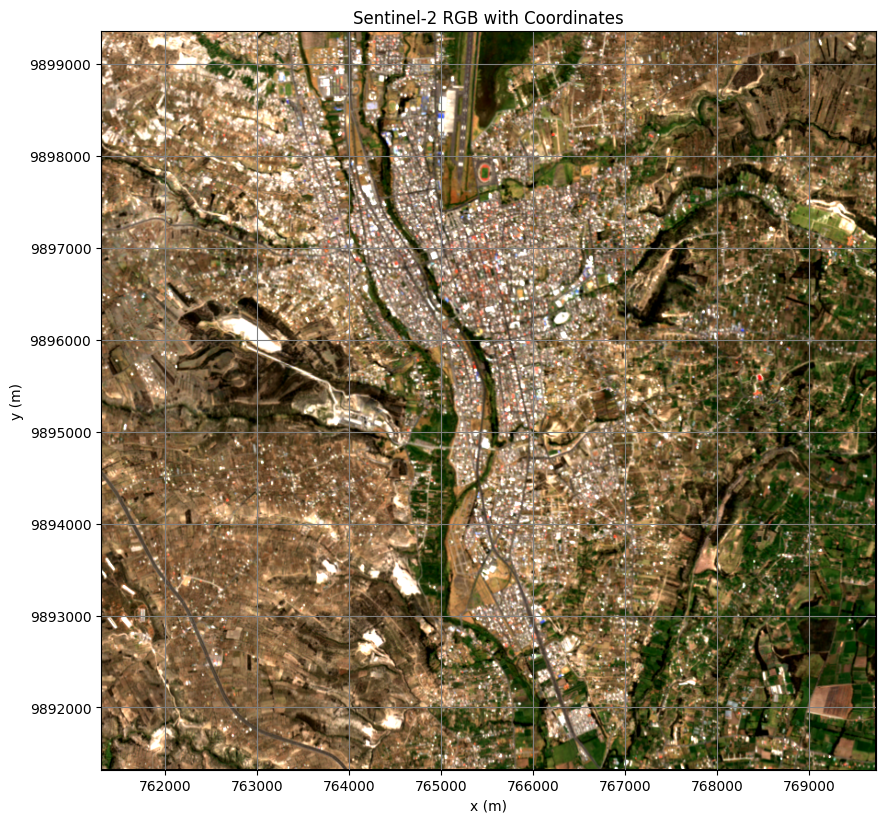

In [14]:
# Plot with coordinates
rgb3 = dataset3.read([1, 2, 3])
rgb3 = rgb3.transpose(1, 2, 0)
bounds3 = dataset3.bounds
extent3 = [bounds3.left, bounds3.right, bounds3.bottom, bounds3.top]
# Apply percentile stretching (e.g., 2nd and 98th percentiles)
p2 = np.percentile(rgb3, 2)
p98 = np.percentile(rgb3, 98)
rgb_stretched3 = np.clip((rgb3 - p2) / (p98 - p2), 0, 1)
plt.figure(figsize=(10, 10))
plt.imshow(rgb_stretched3, extent=extent3)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Sentinel-2 RGB with Coordinates")
plt.grid(True, color='gray')
plt.ticklabel_format(style='plain', useOffset=False, axis='both')
plt.show()

#**Individual bands**

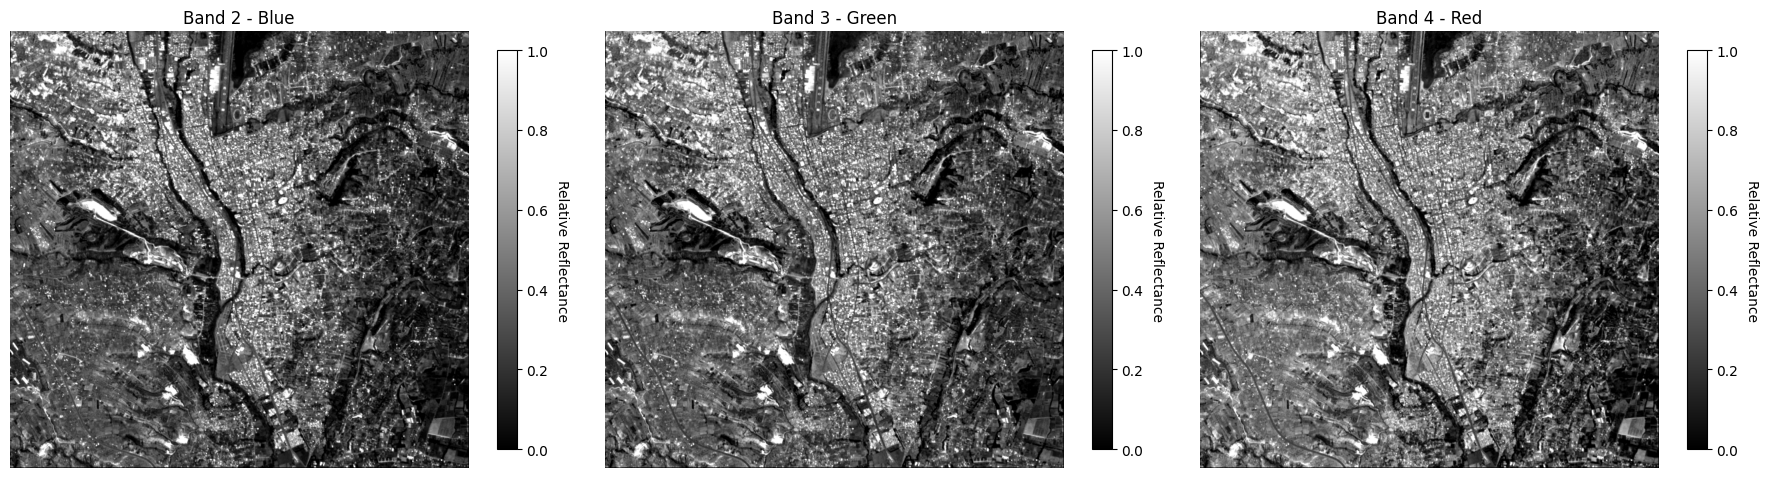

In [21]:
# Read bands
band2 = dataset3.read(3).astype('float32')
band3 = dataset3.read(2).astype('float32')
band4 = dataset3.read(1).astype('float32')
bands = [band2, band3, band4]
titles = ['Band 2 - Blue', 'Band 3 - Green', 'Band 4 - Red']

# contrast stretching
def stretch(b):
    p2, p98 = np.percentile(b, (2, 98))
    return np.clip((b - p2) / (p98 - p2), 0, 1)

bands_stretched = [stretch(b) for b in bands]

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, ax in enumerate(axes):
    im = ax.imshow(bands_stretched[i], cmap='gray')
    ax.set_title(titles[i])
    ax.axis('off')
    cbar = plt.colorbar(im, ax=ax, orientation='vertical', shrink=0.7)
    cbar.set_label('Relative Reflectance', rotation=270, labelpad=15)

plt.tight_layout()
plt.show()

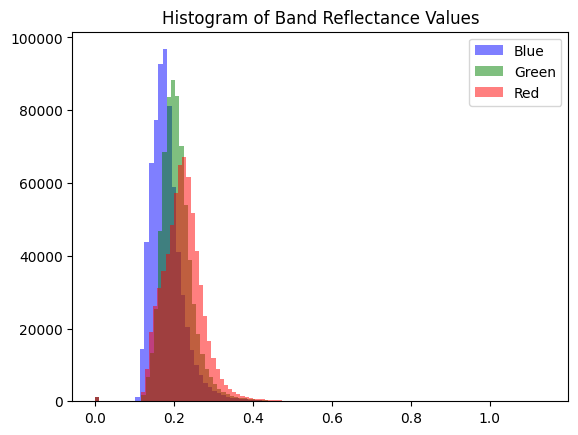

In [23]:
plt.hist(band2.flatten(), bins=100, alpha=0.5, label='Blue', color='blue')
plt.hist(band3.flatten(), bins=100, alpha=0.5, label='Green', color='green')
plt.hist(band4.flatten(), bins=100, alpha=0.5, label='Red', color='Red')
plt.legend()
plt.title('Histogram of Band Reflectance Values')
plt.show()

In [25]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

/tmp/ipython-input-26-71401325.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


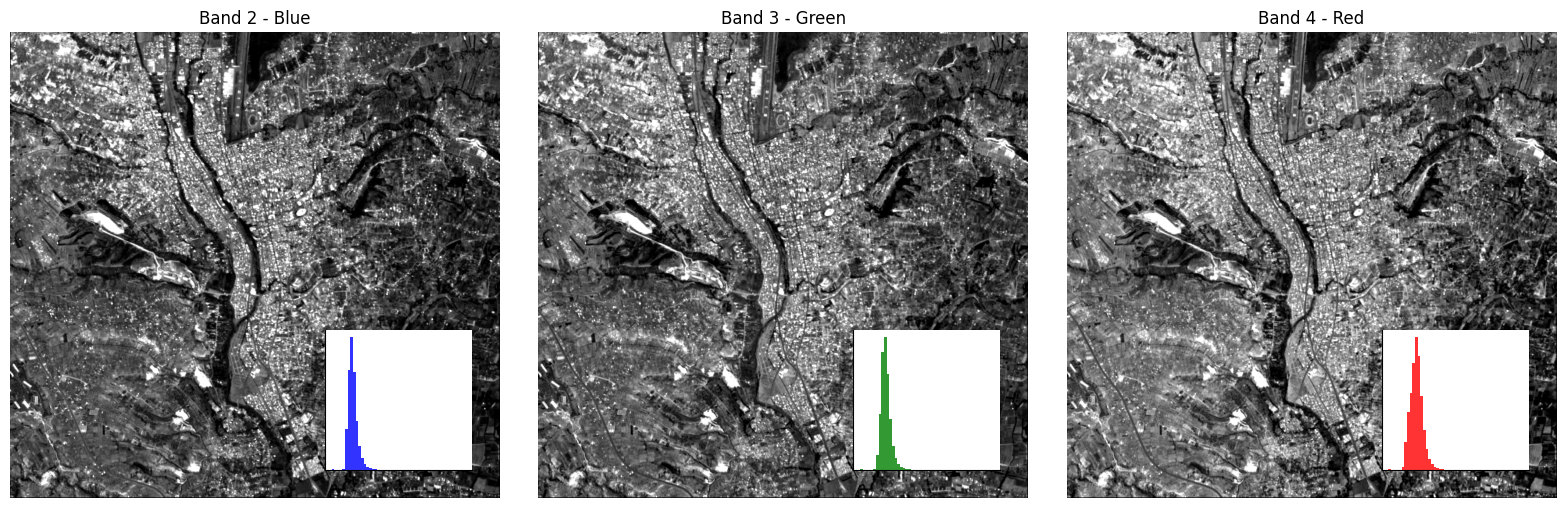

In [26]:
colors = ['blue', 'green', 'red']

# Contrast stretch
def stretch(b):
    p2, p98 = np.percentile(b, (2, 98))
    return np.clip((b - p2) / (p98 - p2), 0, 1)

stretched = [stretch(b) for b in bands]

# Plot: 1 image per band, each with inset histogram
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for i, ax in enumerate(axes):
    # Show image
    ax.imshow(stretched[i], cmap='gray')
    ax.set_title(titles[i])
    ax.axis('off')

    # Inset histogram
    axins = inset_axes(ax, width="30%", height="30%", loc='lower right', borderpad=2)
    axins.hist(bands[i].flatten(), bins=50, color=colors[i], alpha=0.8)
    axins.set_xticks([])
    axins.set_yticks([])
    axins.set_facecolor('white')
    axins.spines['top'].set_visible(False)
    axins.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()